In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from keras.layers import LeakyReLU

In [ ]:
!gdown --id 1GyR1W_tmlAqCABx-6KRtmtHv3X7r6FQI

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GyR1W_tmlAqCABx-6KRtmtHv3X7r6FQI
To: /content/adult_changed.csv
100% 9.17M/9.17M [00:00<00:00, 156MB/s]


In [ ]:
df = pd.read_csv('adult_changed.csv')

In [ ]:
df

,age,fnlwgt,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,income,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,2,2,1,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,4,1,0,0,50,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,4,1,0,0,40,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,2,1,7688,0,40,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,2,4,0,0,0,30,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,1,4,0,0,0,38,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,4,1,0,0,40,1,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,2,4,0,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,2,4,1,0,0,20,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df=df.drop('fnlwgt',1)
df =df[[c for c in df if c not in ['income']] + ['income']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df

,age,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,workclass_1,workclass_2,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,25,7,2,2,1,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,1,4,1,0,0,50,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,1,4,1,0,0,40,1,0,...,0,0,0,0,0,0,1,0,0,1
3,44,10,1,2,1,7688,0,40,0,0,...,0,0,0,0,0,0,1,0,0,1
4,18,10,2,4,0,0,0,30,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,1,4,0,0,0,38,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,40,9,1,4,1,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,1
48839,58,9,2,4,0,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
48840,22,9,2,4,1,0,0,20,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.corr()

,age,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,workclass_1,workclass_2,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
age,1.000000,0.030940,-0.365228,0.028421,0.088120,0.077229,0.056944,0.071558,0.057935,-0.019564,...,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.013523,-0.012337,0.002905,0.230369
educational-num,0.030940,1.000000,-0.050110,0.029239,0.009328,0.125146,0.080972,0.143689,0.097210,-0.014350,...,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.128232,-0.007544,-0.005798,0.332613
marital-status,-0.365228,-0.050110,1.000000,-0.062466,-0.078443,-0.043581,-0.034552,-0.178027,-0.036316,0.007227,...,0.009726,-0.000564,0.003413,0.006048,0.001583,0.002655,-0.022714,0.008571,-0.002639,-0.191235
race,0.028421,0.029239,-0.062466,1.000000,0.086734,0.011581,0.018595,0.039694,-0.028239,-0.004534,...,-0.000759,0.005803,-0.151217,-0.107827,-0.065488,-0.047402,0.203074,-0.128992,0.008517,0.070934
gender,0.088120,0.009328,-0.078443,0.086734,1.000000,0.047094,0.045480,0.228560,-0.038744,0.000958,...,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.006517,-0.001545,0.005262,0.214628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Trinadad&Tobago,0.001056,-0.010201,0.002655,-0.047402,-0.009342,-0.003039,0.004028,-0.002911,0.000947,-0.000337,...,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.077148,-0.000988,-0.000510,-0.009107
native-country_United-States,0.013523,0.128232,-0.022714,0.203074,-0.006517,0.010248,0.011430,0.007874,0.032237,0.004362,...,-0.201721,-0.068034,-0.159362,-0.119748,-0.081324,-0.077148,1.000000,-0.137770,-0.071201,0.037978
native-country_Vietnam,-0.012337,-0.007544,0.008571,-0.128992,-0.001545,-0.002673,-0.000118,-0.008289,-0.003032,-0.000601,...,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.137770,1.000000,-0.000912,-0.015542
native-country_Yugoslavia,0.002905,-0.005798,-0.002639,0.008517,0.005262,-0.000474,-0.004713,-0.000359,-0.001836,-0.000311,...,-0.001335,-0.000450,-0.001054,-0.000792,-0.000538,-0.000510,-0.071201,-0.000912,1.000000,0.005522


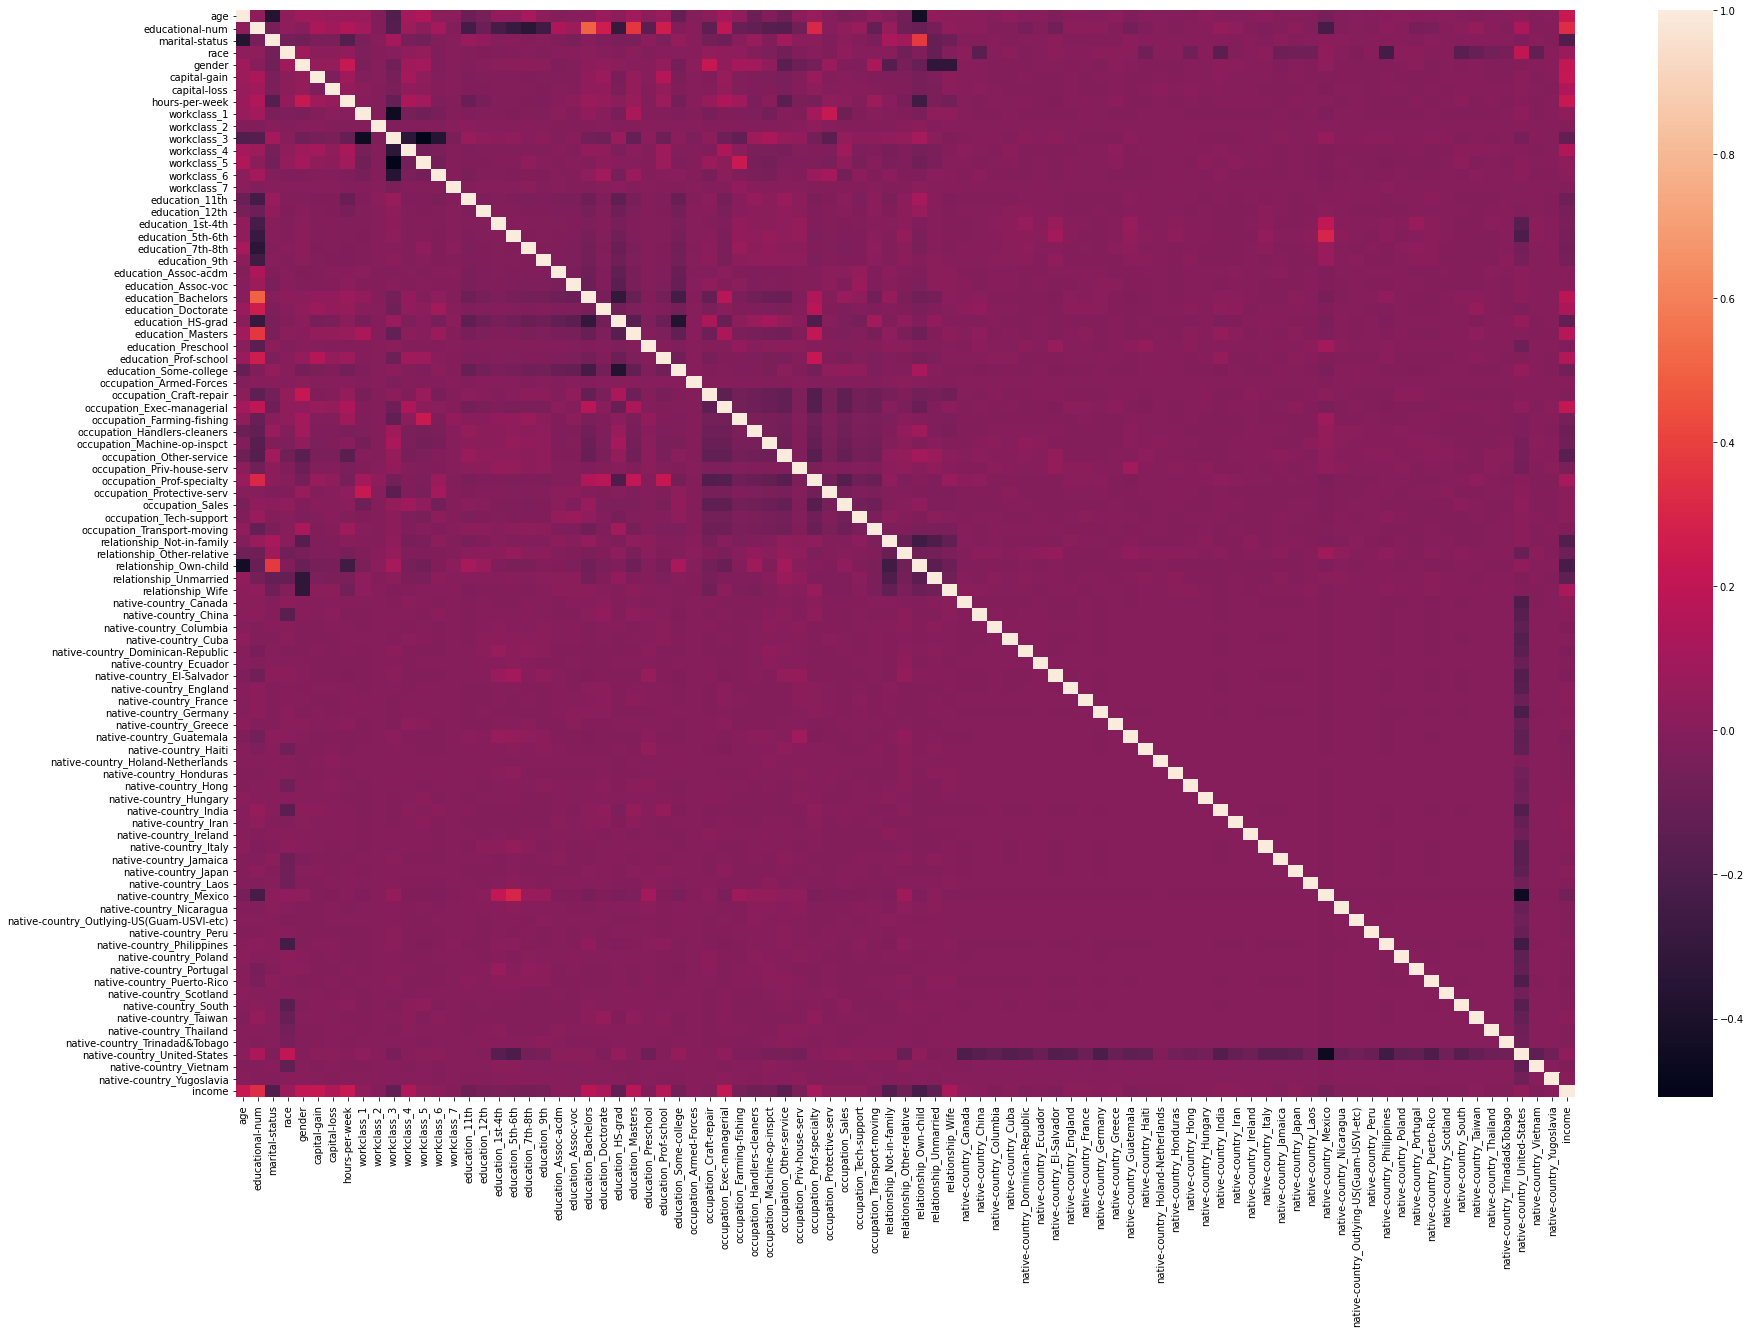

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr())

In [ ]:
df.shape

(48842, 89)

In [ ]:
model = Sequential()
model.add(Dense(6, activation = 'relu', input_dim = 88))
# Adding the second hidden layer
model.add(Dense(6, activation = 'relu'))
# Adding the output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
x = df.iloc[:, 0:88].values
y = df.iloc[:, 88].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
y_train

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train.astype(np.float))
x_test = sc.transform(x_test.astype(np.float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
x_train

array([[-1.28795253, -0.03104519,  1.09069993, ..., -3.2881102 ,
        -0.04113398, -0.02086318],
       [-0.12125538,  1.91104358, -0.38021845, ...,  0.30412606,
        -0.04113398, -0.02086318],
       [-0.19417395, -0.41946294, -0.38021845, ...,  0.30412606,
        -0.04113398, -0.02086318],
       ...,
       [-0.55876681, -0.03104519, -1.85113683, ...,  0.30412606,
        -0.04113398, -0.02086318],
       [ 0.09750034, -0.03104519, -1.85113683, ...,  0.30412606,
        -0.04113398, -0.02086318],
       [-0.70460395, -0.03104519, -1.85113683, ...,  0.30412606,
        -0.04113398, -0.02086318]])

In [ ]:
modelHis = model.fit(x_train, y_train, batch_size = 10, epochs = 30,validation_split = 0.3)

Epoch 1/30
2736/2736 [==============================] - 18s 6ms/step - loss: 0.3799 - accuracy: 0.8189 - val_loss: 0.3363 - val_accuracy: 0.8400
Epoch 2/30
2736/2736 [==============================] - 11s 4ms/step - loss: 0.3296 - accuracy: 0.8467 - val_loss: 0.3283 - val_accuracy: 0.8429
Epoch 3/30
2736/2736 [==============================] - 8s 3ms/step - loss: 0.3234 - accuracy: 0.8491 - val_loss: 0.3254 - val_accuracy: 0.8452
Epoch 4/30
2736/2736 [==============================] - 7s 2ms/step - loss: 0.3209 - accuracy: 0.8491 - val_loss: 0.3265 - val_accuracy: 0.8475
Epoch 5/30
2736/2736 [==============================] - 8s 3ms/step - loss: 0.3184 - accuracy: 0.8515 - val_loss: 0.3253 - val_accuracy: 0.8469
Epoch 6/30
2736/2736 [==============================] - 8s 3ms/step - loss: 0.3175 - accuracy: 0.8529 - val_loss: 0.3240 - val_accuracy: 0.8476
Epoch 7/30
2736/2736 [==============================] - 8s 3ms/step - loss: 0.3155 - accuracy: 0.8539 - val_loss: 0.3229 - val_accurac

In [ ]:
H = modelHis.history

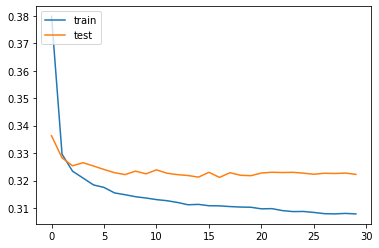

In [ ]:
plt.plot(H['loss'])
plt.plot(H['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

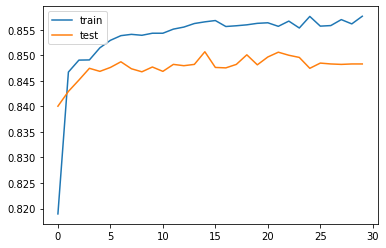

In [ ]:
plt.plot(H['accuracy'])
plt.plot(H['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[6990,  422],
       [ 981, 1376]])

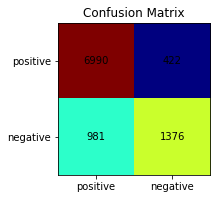

In [ ]:
norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cm.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

In [ ]:
cm2 = cm.tolist()
cm2

[[6990, 422], [981, 1376]]

In [ ]:
cm2[0][0]

6990

In [ ]:
cm2 = [item for sublist in cm2 for item in sublist]


In [ ]:
cm2

[6990, 422, 981, 1376]

In [ ]:
acc = (cm2[0] + cm2[-1])/sum(cm2)

In [ ]:
acc

0.8563824342307299

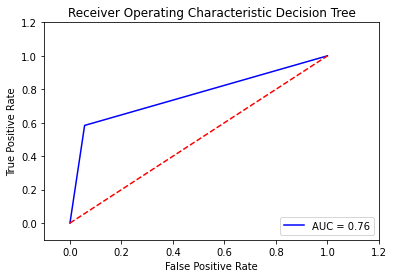

Gini_coefficient = 0.5268582566632196


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gini_coefficient=2*roc_auc - 1
print("Gini_coefficient =",Gini_coefficient)